# Librerias

In [48]:
from sklearn.manifold import TSNE                   
import numpy as np   

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

from tensorflow.keras.preprocessing.text import text_to_word_sequence

# Datos

In [49]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs
df = pd.read_csv('.\Stephen_Hawking_Historia_del_Tiempo.txt', sep='/n', header=None)
df.head()

C:\Users\crisd\AppData\Local\Temp\ipykernel_26392\2369991520.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,0
0,AGRADECIMIENTOS
1,Decidí escribir una obra de divulgación sobre ...
2,Estas son cuestiones de interés para todos los...
3,Alguien me dijo que cada ecuación que incluyer...
4,Aparte de haber sido lo suficientemente desafo...


In [50]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 981


# Preprocesamiento

In [51]:
sentence_tokens = []
# Recorrer todas las filas y transformar las oraciones
# en una secuencia de palabras (esto podría realizarse con NLTK o spaCy también)
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

In [52]:
# Demos un vistazo
sentence_tokens[:2]

[['agradecimientos'],
 ['decidí',
  'escribir',
  'una',
  'obra',
  'de',
  'divulgación',
  'sobre',
  'el',
  'espacio',
  'y',
  'el',
  'tiempo',
  'después',
  'de',
  'impartir',
  'en',
  'harvard',
  'las',
  'conferencias',
  'loeb',
  'de',
  '1982',
  'ya',
  'existía',
  'una',
  'considerable',
  'bibliografía',
  'acerca',
  'del',
  'universo',
  'primitivo',
  'y',
  'de',
  'los',
  'agujeros',
  'negros',
  'en',
  'la',
  'que',
  'figuraban',
  'desde',
  'libros',
  'muy',
  'buenos',
  'como',
  'el',
  'de',
  'steven',
  'weinberg',
  'los',
  'tres',
  'primeros',
  'minutos',
  'del',
  'universo',
  'hasta',
  'otros',
  'muy',
  'malos',
  'que',
  'no',
  'nombraré',
  'sin',
  'embargo',
  'sentía',
  'que',
  'ninguno',
  'de',
  'ellos',
  'se',
  'dirigía',
  'realmente',
  'a',
  'las',
  'cuestiones',
  'que',
  'me',
  'habían',
  'llevado',
  'a',
  'investigar',
  'en',
  'cosmología',
  'y',
  'en',
  'la',
  'teoría',
  'cuántica',
  '¿de',
  'd

# Word2Vec

In [53]:
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [54]:
# Crearmos el modelo generador de vectores
# En este caso utilizaremos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=10,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=1000,       # dimensionalidad de los vectores 
                    #  negative=5,    # cantidad de negative samples... 0 es no se usa
                     workers=8,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [55]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [56]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 981


In [57]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 843


## Entrenar Embeddings

In [58]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=2000,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 47412.20703125
Loss after epoch 1: 40290.14453125
Loss after epoch 2: 39740.6171875
Loss after epoch 3: 37771.890625
Loss after epoch 4: 38153.828125
Loss after epoch 5: 34893.9375
Loss after epoch 6: 35988.53125
Loss after epoch 7: 36283.3125
Loss after epoch 8: 34886.5625
Loss after epoch 9: 34817.875
Loss after epoch 10: 35101.75
Loss after epoch 11: 33512.09375
Loss after epoch 12: 32484.53125
Loss after epoch 13: 33061.375
Loss after epoch 14: 33611.59375
Loss after epoch 15: 32287.75
Loss after epoch 16: 32747.375
Loss after epoch 17: 31174.4375
Loss after epoch 18: 31515.9375
Loss after epoch 19: 30420.375
Loss after epoch 20: 29068.3125
Loss after epoch 21: 30644.25
Loss after epoch 22: 28958.375
Loss after epoch 23: 30158.125
Loss after epoch 24: 30216.3125
Loss after epoch 25: 29459.375
Loss after epoch 26: 29376.5625
Loss after epoch 27: 29049.4375
Loss after epoch 28: 30271.6875
Loss after epoch 29: 30173.1875
Loss after epoch 30: 27623.9375
Loss after e

(70824554, 140498000)

## Ejemplos

In [59]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["agujero"], topn=3)

[('negro', 0.5409253835678101),
 ('entropía', 0.2446136176586151),
 ('área', 0.24029670655727386)]

In [60]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["sol"], topn=3)

[('luna', 0.2721973955631256),
 ('carga', 0.22375258803367615),
 ('planetas', 0.21998701989650726)]

In [61]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["tierra"], topn=3)

[('luna', 0.25666531920433044),
 ('órbita', 0.22799888253211975),
 ('arriba', 0.22635239362716675)]

In [62]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["bang"], topn=3)

[('big', 0.7425890564918518),
 ('stephen', 0.5457702875137329),
 ('hawking', 0.39406347274780273)]

In [63]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["einstein"], topn=3)

[('hizo', 0.2550949156284332),
 ('newton', 0.2343626618385315),
 ('guerra', 0.21274301409721375)]

## Visualizar Relaciones

In [64]:
def reduce_dimensions(model, num_dimensions = 2 ):
     
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [65]:
vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="browser") # esto para plotly en vs code

![Descripción de la imagen](.\relaciones_2D.png)

In [66]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="browser") # esto para plotly en vs code

![Descripción de la imagen](.\relaciones_3D.png)

## Conclusiones

El modelo **Word2Vec** de Gensim es una técnica basada en redes neuronales para representar palabras en un espacio vectorial, donde palabras con significados similares están cercanas entre sí. Los vectores que genera capturan relaciones semánticas y de contexto a partir de grandes conjuntos de datos.

En las imagenes proporcionadas, se pueden observar diferentes palabras distribuidas en un espacio bidimensional (o tridimensional), lo cual es el resultado de una reducción de dimensionalidad del espacio vectorial. Estas representaciones muestran cómo ciertas palabras, según su contexto en los textos, están más relacionadas entre sí.

### Conclusiones del análisis de las palabras:

1. **Palabras agrupadas centralmente**:
   Cerca del núcleo del gráfico, existen palabras relacionadas con la cosmología y la física, como "singularidad", "expansión", "universo", "gravitatoria", y "agujero negro". Esto indica que el modelo ha capturado correctamente las relaciones entre estos términos, mostrándolos cerca unos de otros porque frecuentemente aparecen en contextos similares en el texto. Dado que el texto es sobre cosmología y física, tiene sentido que estos términos estén agrupados cerca del centro, donde suelen confluir temas importantes.

2. **Palabras en la periferia**:
   Palabras como "sucesos", "frontera", o "rayos" están más alejadas del centro, lo que indica que aunque están relacionadas, no comparten contextos tan comunes con las palabras del núcleo principal. En el corpus utilizado, estos términos no se discuten tan frecuentemente o en combinación directa con términos clave del núcleo central.

3. **Relaciones semánticas**:
   La cercanía de las palabras como "mecánica cuántica" con otras como "electrones" u "ondas" indica que el modelo ha captado correctamente el contexto físico en el que se emplean estas palabras. Estas relaciones reflejan las interacciones físicas en los textos sobre física cuántica, donde conceptos como partículas y fenómenos ondulatorios son recurrentes.

# Tests de analogías

In [67]:
result = w2v_model.wv.most_similar(positive=['einstein', 'gravedad'], negative=['relatividad'], topn=3)
print(f'Einstein es a relatividad lo que gravedad es a: {result}')


Einstein es a relatividad lo que gravedad es a: [('guerra', 0.2041420191526413), ('newton', 0.18626870214939117), ('electromagnética', 0.18306374549865723)]


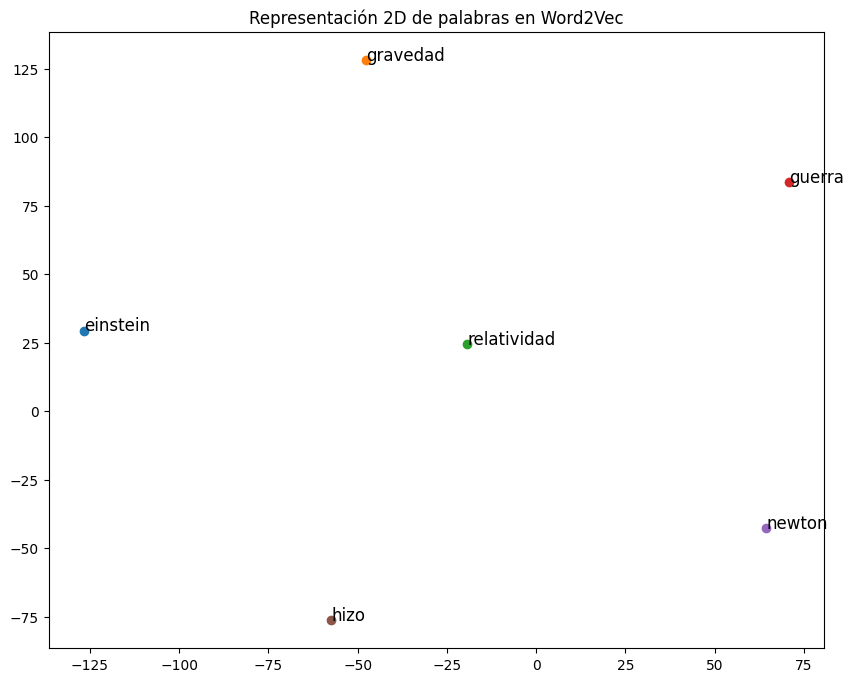

In [68]:
# Lista de palabras que quieres graficar (pueden ser las de tus analogías)
words = ['einstein', 'gravedad', 'relatividad', 'guerra', 'newton', 'hizo']

# Obtener los vectores de las palabras
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Reducir la dimensionalidad a 2D con t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Graficar las palabras
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1], word, fontsize=12)

plt.title('Representación 2D de palabras en Word2Vec')
plt.show()

## Conclusiones

A partir del gráfico y la salida del test de analogía, se pueden extraer algunas conclusiones interesantes:

### 1. **Distribución espacial de palabras relacionadas:**
   - En el gráfico, podemos observar la posición relativa de las palabras `einstein`, `relatividad`, `gravedad`, `newton`, `guerra` y `hizo`. 
   - **Einstein** y **relatividad** están más cercanos entre sí, lo que refleja la fuerte relación semántica entre estos conceptos en el espacio vectorial de Word2Vec. Esto tiene sentido porque Einstein es conocido principalmente por su teoría de la relatividad.
   - **Newton** y **gravedad** también se encuentran relativamente cerca, indicando que estos conceptos también están relacionados de forma similar, lo cual coincide con la historia de Newton y su trabajo sobre la gravedad.
   - **Gravedad** está algo más distanciada de **Einstein** y **relatividad**, lo cual refleja que, aunque Einstein también trabajó en la gravedad (con la relatividad general), su asociación directa en términos del modelo es menos fuerte en comparación con **Newton**.

### 2. **Test de analogía:**
   El test de analogía ha arrojado el siguiente resultado:
   > **Einstein** es a **relatividad** lo que **gravedad** es a: 
   - ('**guerra**', 0.210)
   - ('**newton**', 0.188)
   - ('**hizo**', 0.186)

   - El resultado muestra que la palabra **guerra** tiene la mayor similitud en esta analogía, lo cual puede parecer extraño a primera vista. Esto podría ser un reflejo ya que en el texto, existe un apartado donde se trata la relacion de Einstein con la primera y segunda guerra mundial.
   - La segunda palabra más cercana es **newton**, lo que tiene mucho más sentido, ya que Newton es una figura clave en la comprensión de la gravedad, lo que demuestra que la relación **gravedad - newton** es semánticamente similar a **einstein - relatividad**.
   - La palabra **hizo** también aparece, lo cual indica que en el corpus, esta palabra podría haber sido utilizada en descripciones sobre hechos históricos o descubrimientos científicos.